# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, f=None, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [13]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f6fa775ae90>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f6fa6de5cd0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f6fd1ee2490>)


## 4.2 Baseline

Use the baseline and carry out experiments for a combination of 32, 64 and 128 ReLU hidden units per layer, using from 1-3 hidden layers.

In [3]:
def baseline_early_stopping():
    # Write best epoch number for each combination on file
    with open('../baseline_results/early_stopping.txt', 'w') as f:

        for layer in hidden_layers:
            for hidden_unit in relu_hidden_units_per_layer:
                layers = [
                    AffineLayer(input_dim, hidden_unit, weights_init, biases_init),
                    ReluLayer()
                ]

                affine_layer = AffineLayer(hidden_unit, hidden_unit, weights_init, biases_init)
                relu_layer = ReluLayer()

                if layer == 2:
                    layers.append(affine_layer)
                    layers.append(relu_layer)
                if layer == 3:
                    for i in range(2):
                        layers.append(affine_layer)
                        layers.append(relu_layer)

                layers.append(AffineLayer(hidden_unit, output_dim, weights_init, biases_init))
                model = MultipleLayerModel(layers)

                print(layer, 'layer,', hidden_unit, 'hidden units:')
                print('model:', model, '\n')
                f.write('-' * 20 + '\n')
                f.write('layers: ' + str(layer) + ', hidden_units: ' + str(hidden_unit) + '\n')

                _ = train_model_and_plot_stats(
                    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, f, notebook=True)


In [15]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()


# Run baseline for a combination of parameters
hidden_layers = [1, 2, 3]
relu_hidden_units_per_layer = [32, 64, 128]


Epoch 1: 2.7s to complete
    error(train)=8.44e-01, acc(train)=7.44e-01, error(valid)=8.68e-01, acc(valid)=7.38e-01


Epoch 2: 2.7s to complete
    error(train)=6.60e-01, acc(train)=7.93e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


Epoch 3: 2.6s to complete
    error(train)=5.92e-01, acc(train)=8.10e-01, error(valid)=6.41e-01, acc(valid)=7.95e-01


Epoch 4: 3.0s to complete
    error(train)=5.24e-01, acc(train)=8.31e-01, error(valid)=5.85e-01, acc(valid)=8.10e-01


Epoch 5: 2.7s to complete
    error(train)=4.98e-01, acc(train)=8.36e-01, error(valid)=5.74e-01, acc(valid)=8.16e-01


Epoch 6: 2.6s to complete
    error(train)=4.63e-01, acc(train)=8.44e-01, error(valid)=5.50e-01, acc(valid)=8.23e-01


Epoch 7: 2.5s to complete
    error(train)=4.18e-01, acc(train)=8.58e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 8: 2.6s to complete
    error(train)=4.07e-01, acc(train)=8.62e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 9: 2.6s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=5.26e-01, acc(valid)=8.28e-01


Epoch 10: 2.7s to complete
    error(train)=3.93e-01, acc(train)=8.65e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


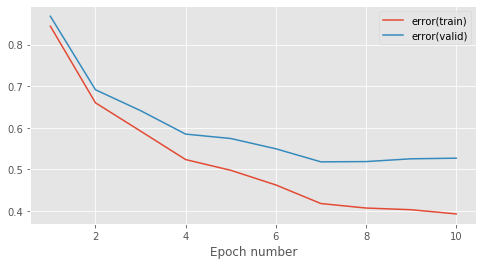

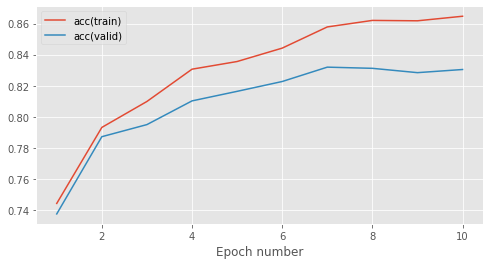

In [16]:
#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [6]:
baseline_early_stopping()

1 layer, 32 hidden units:
model: MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=32)
    ReluLayer
    AffineLayer(input_dim=32, output_dim=47)
) 



KeyboardInterrupt: 

counter= 0
epochs= 30
1 layer, 32 hidden units



Epoch 1: 6.4s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=1.10e+00, acc(valid)=8.04e-01


Epoch 2: 7.7s to complete
    error(train)=1.57e-01, acc(train)=9.34e-01, error(valid)=1.09e+00, acc(valid)=8.05e-01


Epoch 3: 7.7s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=1.11e+00, acc(valid)=8.07e-01


Epoch 4: 6.6s to complete
    error(train)=1.56e-01, acc(train)=9.36e-01, error(valid)=1.13e+00, acc(valid)=8.04e-01


Epoch 5: 5.9s to complete
    error(train)=1.59e-01, acc(train)=9.34e-01, error(valid)=1.13e+00, acc(valid)=8.05e-01


Epoch 6: 5.9s to complete
    error(train)=1.50e-01, acc(train)=9.37e-01, error(valid)=1.15e+00, acc(valid)=8.03e-01


Epoch 7: 6.6s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=1.15e+00, acc(valid)=8.09e-01


Epoch 8: 7.4s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=1.17e+00, acc(valid)=8.03e-01


Epoch 9: 6.1s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=1.18e+00, acc(valid)=8.01e-01


Epoch 10: 7.5s to complete
    error(train)=1.49e-01, acc(train)=9.38e-01, error(valid)=1.18e+00, acc(valid)=8.05e-01


Epoch 11: 7.3s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=1.19e+00, acc(valid)=8.02e-01


Epoch 12: 6.4s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.19e+00, acc(valid)=8.05e-01


Epoch 13: 6.0s to complete
    error(train)=1.45e-01, acc(train)=9.39e-01, error(valid)=1.20e+00, acc(valid)=8.02e-01


Epoch 14: 6.0s to complete
    error(train)=1.53e-01, acc(train)=9.36e-01, error(valid)=1.24e+00, acc(valid)=8.02e-01


Epoch 15: 5.9s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=1.23e+00, acc(valid)=8.04e-01


Epoch 16: 5.7s to complete
    error(train)=1.48e-01, acc(train)=9.40e-01, error(valid)=1.22e+00, acc(valid)=8.08e-01


Epoch 17: 5.3s to complete
    error(train)=1.46e-01, acc(train)=9.41e-01, error(valid)=1.24e+00, acc(valid)=8.06e-01


Epoch 18: 5.6s to complete
    error(train)=1.34e-01, acc(train)=9.44e-01, error(valid)=1.24e+00, acc(valid)=8.04e-01


Epoch 19: 6.7s to complete
    error(train)=1.42e-01, acc(train)=9.42e-01, error(valid)=1.27e+00, acc(valid)=8.05e-01


Epoch 20: 5.8s to complete
    error(train)=1.39e-01, acc(train)=9.42e-01, error(valid)=1.29e+00, acc(valid)=8.04e-01


Epoch 21: 7.0s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=1.25e+00, acc(valid)=8.06e-01


Epoch 22: 7.0s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=1.29e+00, acc(valid)=8.04e-01


Epoch 23: 6.0s to complete
    error(train)=1.39e-01, acc(train)=9.44e-01, error(valid)=1.29e+00, acc(valid)=8.01e-01


Epoch 24: 5.8s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=1.32e+00, acc(valid)=8.07e-01


Epoch 25: 6.2s to complete
    error(train)=1.40e-01, acc(train)=9.44e-01, error(valid)=1.33e+00, acc(valid)=8.03e-01


Epoch 26: 5.9s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=1.38e+00, acc(valid)=8.00e-01


Epoch 27: 6.0s to complete
    error(train)=1.46e-01, acc(train)=9.41e-01, error(valid)=1.33e+00, acc(valid)=8.03e-01


Epoch 28: 7.2s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=1.36e+00, acc(valid)=8.01e-01


Epoch 29: 6.4s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=1.35e+00, acc(valid)=8.02e-01


Epoch 30: 6.1s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.40e+00, acc(valid)=8.03e-01



test acc: [0.80373418 0.805      0.80696203 0.8043038  0.80487342 0.80272152
 0.80898734 0.80291139 0.80139241 0.80462025 0.80189873 0.80544304
 0.80202532 0.80158228 0.80417722 0.80841772 0.80588608 0.80449367
 0.80537975 0.80449367 0.80632911 0.80405063 0.8014557  0.80658228
 0.80335443 0.79974684 0.80303797 0.80132911 0.80177215 0.80316456]
counter= 1
epochs= 23
1 layer, 64 hidden units



Epoch 1: 5.9s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=1.39e+00, acc(valid)=8.04e-01


Epoch 2: 6.0s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.42e+00, acc(valid)=7.99e-01


Epoch 3: 5.4s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.39e+00, acc(valid)=8.04e-01


Epoch 4: 5.0s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.40e+00, acc(valid)=8.06e-01


Epoch 5: 5.0s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.41e+00, acc(valid)=8.02e-01


Epoch 6: 4.8s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=1.42e+00, acc(valid)=7.99e-01


Epoch 7: 4.9s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.44e+00, acc(valid)=8.01e-01


Epoch 8: 5.0s to complete
    error(train)=1.47e-01, acc(train)=9.41e-01, error(valid)=1.47e+00, acc(valid)=8.00e-01


Epoch 9: 4.7s to complete
    error(train)=1.38e-01, acc(train)=9.43e-01, error(valid)=1.48e+00, acc(valid)=8.04e-01


Epoch 10: 4.8s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=1.48e+00, acc(valid)=8.01e-01


Epoch 11: 4.8s to complete
    error(train)=1.26e-01, acc(train)=9.47e-01, error(valid)=1.47e+00, acc(valid)=8.01e-01


Epoch 12: 5.0s to complete
    error(train)=1.27e-01, acc(train)=9.46e-01, error(valid)=1.47e+00, acc(valid)=7.98e-01


Epoch 13: 5.0s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=1.49e+00, acc(valid)=8.01e-01


Epoch 14: 4.8s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.50e+00, acc(valid)=8.01e-01


Epoch 15: 4.8s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.53e+00, acc(valid)=7.97e-01


Epoch 16: 4.7s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=1.54e+00, acc(valid)=7.99e-01


Epoch 17: 4.8s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.55e+00, acc(valid)=7.98e-01


Epoch 18: 4.8s to complete
    error(train)=1.17e-01, acc(train)=9.51e-01, error(valid)=1.55e+00, acc(valid)=7.99e-01


Epoch 19: 4.7s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.56e+00, acc(valid)=7.98e-01


Epoch 20: 4.7s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.60e+00, acc(valid)=8.01e-01


Epoch 21: 5.2s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.59e+00, acc(valid)=7.98e-01


Epoch 22: 4.5s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.58e+00, acc(valid)=8.02e-01


Epoch 23: 4.9s to complete
    error(train)=1.19e-01, acc(train)=9.52e-01, error(valid)=1.58e+00, acc(valid)=8.03e-01



test acc: [0.80360759 0.79943038 0.80392405 0.80550633 0.80240506 0.79892405
 0.80113924 0.80025316 0.80449367 0.80101266 0.8014557  0.79797468
 0.80050633 0.80082278 0.79677215 0.79924051 0.79759494 0.7993038
 0.79816456 0.80088608 0.79829114 0.80234177 0.80335443]
counter= 2
epochs= 10
1 layer, 128 hidden units



Epoch 1: 5.8s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.60e+00, acc(valid)=8.00e-01


Epoch 2: 6.3s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=1.63e+00, acc(valid)=7.98e-01


Epoch 3: 5.9s to complete
    error(train)=1.22e-01, acc(train)=9.51e-01, error(valid)=1.61e+00, acc(valid)=7.99e-01


Epoch 4: 6.2s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=1.70e+00, acc(valid)=7.97e-01


Epoch 5: 7.0s to complete
    error(train)=1.13e-01, acc(train)=9.54e-01, error(valid)=1.63e+00, acc(valid)=8.00e-01


Epoch 6: 5.7s to complete
    error(train)=1.21e-01, acc(train)=9.50e-01, error(valid)=1.67e+00, acc(valid)=7.99e-01


Epoch 7: 6.1s to complete
    error(train)=1.20e-01, acc(train)=9.50e-01, error(valid)=1.66e+00, acc(valid)=8.00e-01


Epoch 8: 5.8s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=1.69e+00, acc(valid)=7.98e-01


Epoch 9: 6.4s to complete
    error(train)=1.27e-01, acc(train)=9.47e-01, error(valid)=1.68e+00, acc(valid)=7.98e-01


Epoch 10: 5.4s to complete
    error(train)=1.20e-01, acc(train)=9.52e-01, error(valid)=1.71e+00, acc(valid)=7.99e-01



test acc: [0.8        0.79841772 0.79911392 0.79740506 0.79981013 0.79917722
 0.80031646 0.79765823 0.79803797 0.79905063]
counter= 3
epochs= 19
2 layer, 32 hidden units



Epoch 1: 5.8s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.70e+00, acc(valid)=8.00e-01


Epoch 2: 5.8s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.77e+00, acc(valid)=7.99e-01


Epoch 3: 5.8s to complete
    error(train)=1.23e-01, acc(train)=9.49e-01, error(valid)=1.76e+00, acc(valid)=7.99e-01


Epoch 4: 5.3s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.75e+00, acc(valid)=8.02e-01


Epoch 5: 6.7s to complete
    error(train)=1.16e-01, acc(train)=9.51e-01, error(valid)=1.75e+00, acc(valid)=7.98e-01


Epoch 6: 7.2s to complete
    error(train)=1.29e-01, acc(train)=9.49e-01, error(valid)=1.77e+00, acc(valid)=8.00e-01


Epoch 7: 5.9s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.78e+00, acc(valid)=7.96e-01


Epoch 8: 6.6s to complete
    error(train)=1.08e-01, acc(train)=9.55e-01, error(valid)=1.78e+00, acc(valid)=7.99e-01


Epoch 9: 5.6s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.78e+00, acc(valid)=7.97e-01


Epoch 10: 6.8s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.81e+00, acc(valid)=7.93e-01


Epoch 11: 7.2s to complete
    error(train)=1.25e-01, acc(train)=9.50e-01, error(valid)=1.86e+00, acc(valid)=7.95e-01


Epoch 12: 6.4s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.84e+00, acc(valid)=7.98e-01


Epoch 13: 6.5s to complete
    error(train)=1.15e-01, acc(train)=9.53e-01, error(valid)=1.84e+00, acc(valid)=7.98e-01


Epoch 14: 6.3s to complete
    error(train)=1.26e-01, acc(train)=9.50e-01, error(valid)=1.88e+00, acc(valid)=7.94e-01


Epoch 15: 4.3s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.85e+00, acc(valid)=7.96e-01


Epoch 16: 3.0s to complete
    error(train)=1.19e-01, acc(train)=9.50e-01, error(valid)=1.87e+00, acc(valid)=7.94e-01


Epoch 17: 3.2s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.86e+00, acc(valid)=7.99e-01


Epoch 18: 3.4s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.85e+00, acc(valid)=7.96e-01


Epoch 19: 2.9s to complete
    error(train)=1.09e-01, acc(train)=9.55e-01, error(valid)=1.88e+00, acc(valid)=7.96e-01



test acc: [0.80037975 0.7993038  0.7993038  0.80170886 0.79810127 0.80025316
 0.79632911 0.7985443  0.79664557 0.79272152 0.79487342 0.79797468
 0.79816456 0.79367089 0.7964557  0.79373418 0.79873418 0.79620253
 0.79582278]
counter= 4
epochs= 12
2 layer, 64 hidden units



Epoch 1: 3.3s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=1.94e+00, acc(valid)=7.98e-01


Epoch 2: 2.7s to complete
    error(train)=1.10e-01, acc(train)=9.55e-01, error(valid)=1.92e+00, acc(valid)=7.95e-01


Epoch 3: 2.8s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.90e+00, acc(valid)=7.90e-01


Epoch 4: 3.1s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.94e+00, acc(valid)=7.93e-01


Epoch 5: 2.7s to complete
    error(train)=1.11e-01, acc(train)=9.54e-01, error(valid)=1.91e+00, acc(valid)=7.97e-01


Epoch 6: 2.8s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.96e+00, acc(valid)=7.94e-01


Epoch 7: 2.9s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=1.93e+00, acc(valid)=7.99e-01


Epoch 8: 3.3s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.96e+00, acc(valid)=7.93e-01


Epoch 9: 3.0s to complete
    error(train)=1.24e-01, acc(train)=9.51e-01, error(valid)=2.00e+00, acc(valid)=7.97e-01


Epoch 10: 2.9s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.98e+00, acc(valid)=7.99e-01


Epoch 11: 2.8s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=2.01e+00, acc(valid)=7.92e-01


Epoch 12: 2.8s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=1.98e+00, acc(valid)=7.94e-01



test acc: [0.7978481  0.79487342 0.78987342 0.79253165 0.79734177 0.79373418
 0.79886076 0.79341772 0.79651899 0.79949367 0.7921519  0.79449367]
counter= 5
epochs= 9
2 layer, 128 hidden units



Epoch 1: 3.2s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=2.03e+00, acc(valid)=8.00e-01


Epoch 2: 2.9s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=2.00e+00, acc(valid)=7.97e-01


Epoch 3: 2.8s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=2.04e+00, acc(valid)=7.93e-01


Epoch 4: 2.8s to complete
    error(train)=1.06e-01, acc(train)=9.57e-01, error(valid)=2.06e+00, acc(valid)=7.94e-01


Epoch 5: 3.1s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=2.05e+00, acc(valid)=7.96e-01


Epoch 6: 2.8s to complete
    error(train)=1.13e-01, acc(train)=9.55e-01, error(valid)=2.09e+00, acc(valid)=7.90e-01


Epoch 7: 3.1s to complete
    error(train)=1.14e-01, acc(train)=9.55e-01, error(valid)=2.06e+00, acc(valid)=7.93e-01


Epoch 8: 2.8s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=2.10e+00, acc(valid)=7.91e-01


Epoch 9: 2.8s to complete
    error(train)=1.14e-01, acc(train)=9.55e-01, error(valid)=2.08e+00, acc(valid)=7.96e-01



test acc: [0.79955696 0.79740506 0.79348101 0.79373418 0.79613924 0.78987342
 0.79329114 0.79075949 0.79607595]
counter= 6
epochs= 12
3 layer, 32 hidden units



Epoch 1: 2.9s to complete
    error(train)=9.78e-02, acc(train)=9.60e-01, error(valid)=2.08e+00, acc(valid)=7.96e-01


Epoch 2: 3.2s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=2.10e+00, acc(valid)=7.96e-01


Epoch 3: 3.6s to complete
    error(train)=1.34e-01, acc(train)=9.49e-01, error(valid)=2.19e+00, acc(valid)=7.91e-01


Epoch 4: 2.7s to complete
    error(train)=9.73e-02, acc(train)=9.61e-01, error(valid)=2.14e+00, acc(valid)=7.95e-01


Epoch 5: 2.7s to complete
    error(train)=1.22e-01, acc(train)=9.52e-01, error(valid)=2.17e+00, acc(valid)=7.92e-01


Epoch 6: 2.8s to complete
    error(train)=9.66e-02, acc(train)=9.61e-01, error(valid)=2.12e+00, acc(valid)=7.96e-01


Epoch 7: 2.8s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=2.18e+00, acc(valid)=7.98e-01


Epoch 8: 3.0s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=2.20e+00, acc(valid)=7.93e-01


Epoch 9: 2.8s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=2.19e+00, acc(valid)=7.97e-01


Epoch 10: 2.9s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=2.18e+00, acc(valid)=7.96e-01


Epoch 11: 2.9s to complete
    error(train)=1.01e-01, acc(train)=9.59e-01, error(valid)=2.19e+00, acc(valid)=7.93e-01


Epoch 12: 3.1s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=2.17e+00, acc(valid)=7.97e-01



test acc: [0.79601266 0.7956962  0.79050633 0.79468354 0.79158228 0.79639241
 0.79759494 0.79272152 0.79740506 0.79588608 0.79329114 0.79683544]
counter= 7
epochs= 11
3 layer, 64 hidden units



Epoch 1: 3.0s to complete
    error(train)=1.05e-01, acc(train)=9.57e-01, error(valid)=2.23e+00, acc(valid)=7.93e-01


Epoch 2: 2.9s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=2.22e+00, acc(valid)=7.91e-01


Epoch 3: 2.8s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=2.26e+00, acc(valid)=7.95e-01


Epoch 4: 2.9s to complete
    error(train)=1.02e-01, acc(train)=9.60e-01, error(valid)=2.26e+00, acc(valid)=7.96e-01


Epoch 5: 2.8s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=2.25e+00, acc(valid)=7.93e-01


Epoch 6: 2.9s to complete
    error(train)=1.15e-01, acc(train)=9.55e-01, error(valid)=2.28e+00, acc(valid)=7.95e-01


Epoch 7: 3.0s to complete
    error(train)=1.04e-01, acc(train)=9.58e-01, error(valid)=2.27e+00, acc(valid)=7.97e-01


Epoch 8: 3.1s to complete
    error(train)=1.02e-01, acc(train)=9.59e-01, error(valid)=2.24e+00, acc(valid)=7.96e-01


Epoch 9: 2.7s to complete
    error(train)=1.00e-01, acc(train)=9.60e-01, error(valid)=2.25e+00, acc(valid)=7.95e-01


Epoch 10: 2.7s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=2.29e+00, acc(valid)=7.92e-01


Epoch 11: 2.8s to complete
    error(train)=1.01e-01, acc(train)=9.60e-01, error(valid)=2.33e+00, acc(valid)=7.93e-01



test acc: [0.79310127 0.79101266 0.79455696 0.79613924 0.79335443 0.79512658
 0.79689873 0.79550633 0.79544304 0.79221519 0.79265823]
counter= 8
epochs= 8
3 layer, 128 hidden units



Epoch 1: 2.6s to complete
    error(train)=9.60e-02, acc(train)=9.61e-01, error(valid)=2.31e+00, acc(valid)=7.93e-01


Epoch 2: 2.6s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=2.37e+00, acc(valid)=7.95e-01


Epoch 3: 2.8s to complete
    error(train)=1.03e-01, acc(train)=9.59e-01, error(valid)=2.37e+00, acc(valid)=7.94e-01


Epoch 4: 2.7s to complete
    error(train)=1.01e-01, acc(train)=9.60e-01, error(valid)=2.39e+00, acc(valid)=7.91e-01


Epoch 5: 2.7s to complete
    error(train)=1.10e-01, acc(train)=9.57e-01, error(valid)=2.38e+00, acc(valid)=7.97e-01


Epoch 6: 3.2s to complete
    error(train)=9.78e-02, acc(train)=9.61e-01, error(valid)=2.31e+00, acc(valid)=7.95e-01


Epoch 7: 3.9s to complete
    error(train)=8.94e-02, acc(train)=9.63e-01, error(valid)=2.34e+00, acc(valid)=7.98e-01


Epoch 8: 3.0s to complete
    error(train)=9.58e-02, acc(train)=9.61e-01, error(valid)=2.37e+00, acc(valid)=7.98e-01



test acc: [0.7928481  0.79512658 0.79411392 0.79139241 0.79734177 0.79487342
 0.7978481  0.79791139]


{'1_32': array([0.80373418, 0.805     , 0.80696203, 0.8043038 , 0.80487342,
       0.80272152, 0.80898734, 0.80291139, 0.80139241, 0.80462025,
       0.80189873, 0.80544304, 0.80202532, 0.80158228, 0.80417722,
       0.80841772, 0.80588608, 0.80449367, 0.80537975, 0.80449367,
       0.80632911, 0.80405063, 0.8014557 , 0.80658228, 0.80335443,
       0.79974684, 0.80303797, 0.80132911, 0.80177215, 0.80316456]), '1_64': array([0.80360759, 0.79943038, 0.80392405, 0.80550633, 0.80240506,
       0.79892405, 0.80113924, 0.80025316, 0.80449367, 0.80101266,
       0.8014557 , 0.79797468, 0.80050633, 0.80082278, 0.79677215,
       0.79924051, 0.79759494, 0.7993038 , 0.79816456, 0.80088608,
       0.79829114, 0.80234177, 0.80335443]), '1_128': array([0.8       , 0.79841772, 0.79911392, 0.79740506, 0.79981013,
       0.79917722, 0.80031646, 0.79765823, 0.79803797, 0.79905063]), '2_32': array([0.

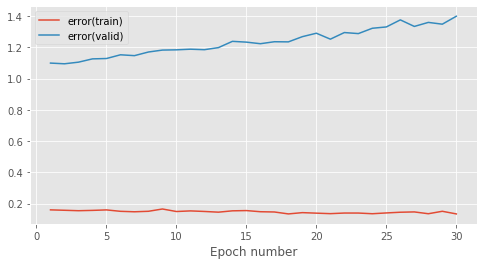

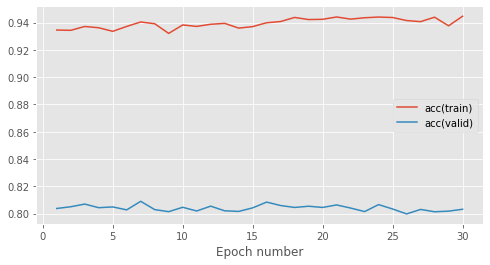

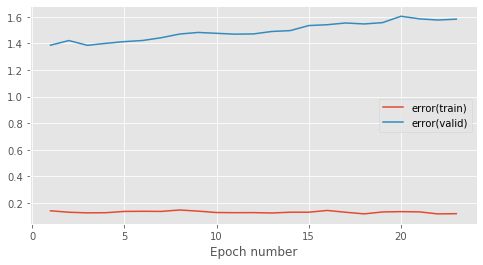

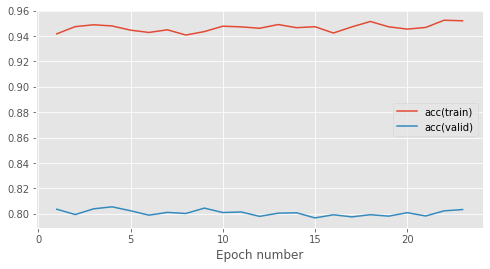

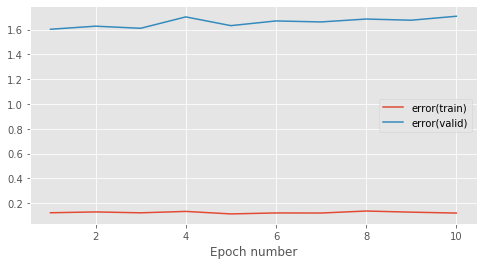

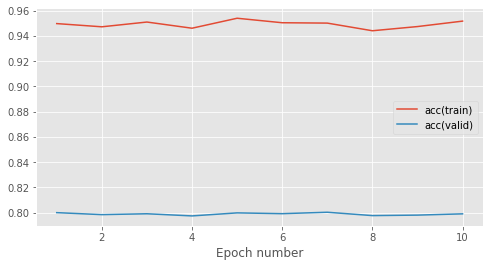

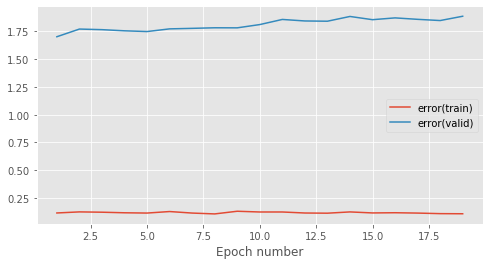

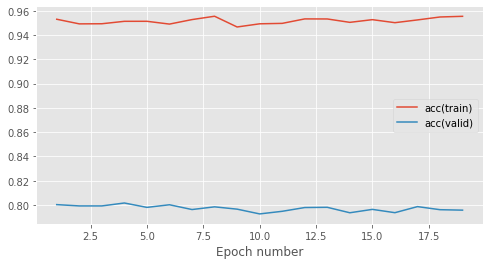

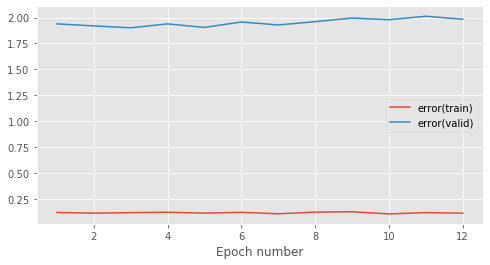

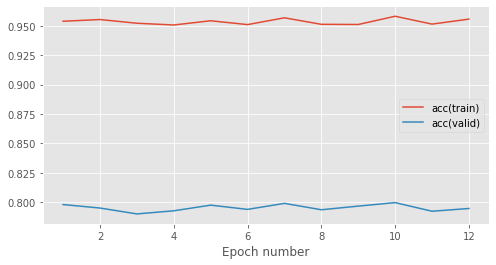

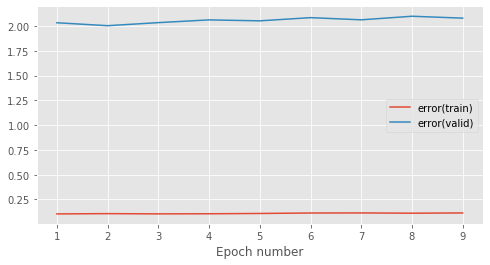

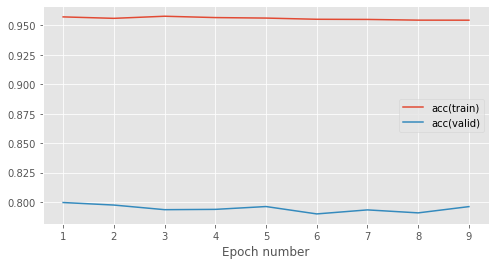

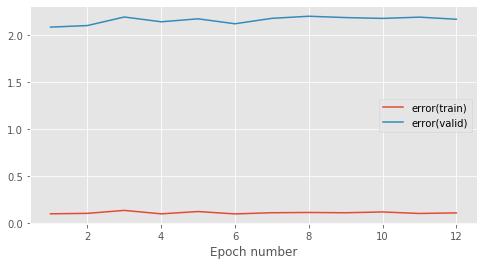

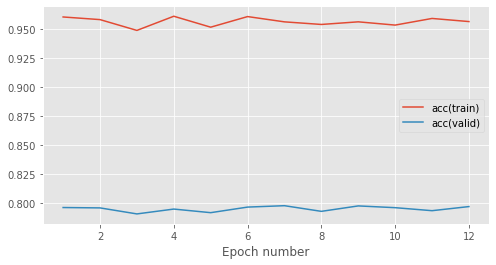

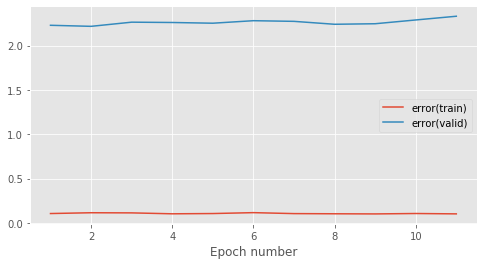

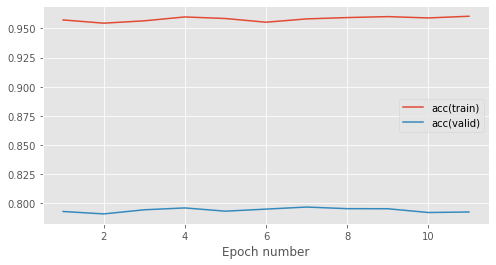

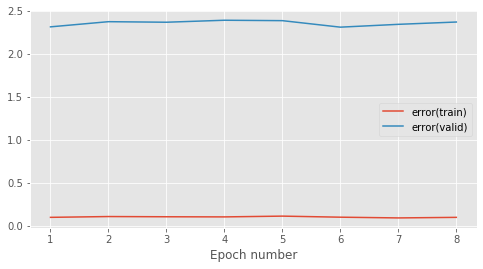

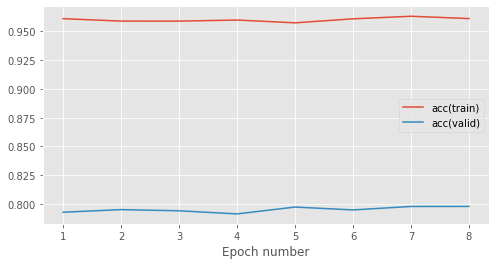

In [12]:
# Test combinations on test data
epochs = [30, 23, 10, 19, 12, 9, 12, 11, 8]
counter = 0
test_accuracy = dict()

for layer in hidden_layers:
    for hidden_unit in relu_hidden_units_per_layer:
        print('counter=', counter)
        print('epochs=', epochs[counter])
        num_epochs = epochs[counter]
        print(layer, 'layer,', hidden_unit, 'hidden units\n')
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True)
        print('test acc:', stats[1:, keys['acc(valid)']])
        key = str(layer) + '_' + str(hidden_unit)
        test_accuracy[key] = stats[1:, keys['acc(valid)']]
        counter += 1

print('\n')
print(test_accuracy)

In [18]:
for key in test_accuracy:
    print(key, max(test_accuracy[key]))
    

1_32 0.8089873417721519
1_64 0.8055063291139242
1_128 0.8003164556962029
2_32 0.8017088607594935
2_64 0.799493670886076
2_128 0.7995569620253162
3_32 0.7975949367088606
3_64 0.7968987341772155
3_128 0.7979113924050635
